<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/%EC%97%B0%EC%8A%B5/tidymodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2022.05.25~<br>
# Package ‘tidymodels’ + 'tidyverse'<br>

- hotel데이터 전처리 완료한거 다시 불러오기 
- https://stackoverflow.com/questions/62189885/what-is-the-difference-among-prep-bake-juice-in-the-r-package-recipes

[예제]

In [ ]:
library(recipes)

cars_train <- mtcars[1:20,]
cars_test <- mtcars[21:32,]

cars_rec <- recipe(mpg ~ ., data = cars_train) %>%
  step_log(disp) %>%
  step_center(all_predictors())
cars_rec
#> Data Recipe
#> 
#> Inputs:
#> 
#>       role #variables
#>    outcome          1
#>  predictor         10
#> 
#> Operations:
#> 
#> Log transformation on disp
#> Centering for all_predictors

In [ ]:
cars_prep <- prep(cars_rec)
cars_prep
#> Data Recipe
#> 
#> Inputs:
#> 
#>       role #variables
#>    outcome          1
#>  predictor         10
#> 
#> Training data contained 20 data points and no missing data.
#> 
#> Operations:
#> 
#> Log transformation on disp [trained]
#> Centering for cyl, disp, hp, drat, wt, qsec, vs, am, ... [trained]

In [ ]:
bake(cars_prep, new_data = cars_train)

In [ ]:
bake(cars_prep, new_data = cars_test)

In [ ]:
juice(cars_prep)

# 1. 라이브러리 및 데이터 로드

In [5]:
install.packages(c("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","pacman"))
pacman::p_load("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","pacman")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("GGally") ; library(GGally)

In [6]:
theme_set(theme_bw())

In [12]:
system("gdown --id 17bke1KhCQFDjVToiNybtczlKqkWmWlvg")

In [13]:
df=read_csv("hotel.csv")

Rows: 119390 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): hotel_type, meal, reserved_room_type, assigned_room_type
dbl (13): is_canceled, lead_time, stays_in_weekend_nights, stays_in_week_nig...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
#티블로 변경
tib<-as_tibble(df)

# 2. 데이터 기본정보

In [17]:
head(tib)

hotel_type,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
City Hotel,0,150,1,2,2,0,0,BB,0,0,0,A,A,0,0,77.00
City Hotel,0,126,1,4,2,0,0,BB,0,0,0,A,A,0,0,74.80
City Hotel,0,4,0,2,2,0,0,BB,0,0,0,A,A,0,0,106.00
City Hotel,1,47,1,2,2,0,0,BB,0,0,0,A,A,0,0,125.00
City Hotel,0,124,0,4,2,0,0,BB,0,0,0,A,A,0,0,96.53
Resort Hotel,1,146,0,3,2,0,0,Undefined,0,0,0,A,A,0,60,46.00


In [18]:
skim(tib)

── Data Summary ────────────────────────
                           Values
Name                       train 
Number of rows             83573 
Number of columns          17    
_______________________          
Column type frequency:           
  character                4     
  numeric                  13    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 hotel_type                 0             1  10  12     0        2          0
2 meal                       0             1   2   9     0        5          0
3 reserved_room_type         0             1   1   4     0        5          0
4 assigned_room_type         0             1   1   4     0        5          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable                  n_missing complete_rate   

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


전처리 완료한거 불러와서 다시 시작 

In [19]:
df<-

── Data Summary ────────────────────────
                           Values
Name                       test  
Number of rows             35817 
Number of columns          17    
_______________________          
Column type frequency:           
  character                4     
  numeric                  13    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 hotel_type                 0             1  10  12     0        2          0
2 meal                       0             1   2   9     0        5          0
3 reserved_room_type         0             1   1   4     0        5          0
4 assigned_room_type         0             1   1   4     0        5          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable                  n_missing complete_rate   

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


# 3. 일변량 데이터 분포

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



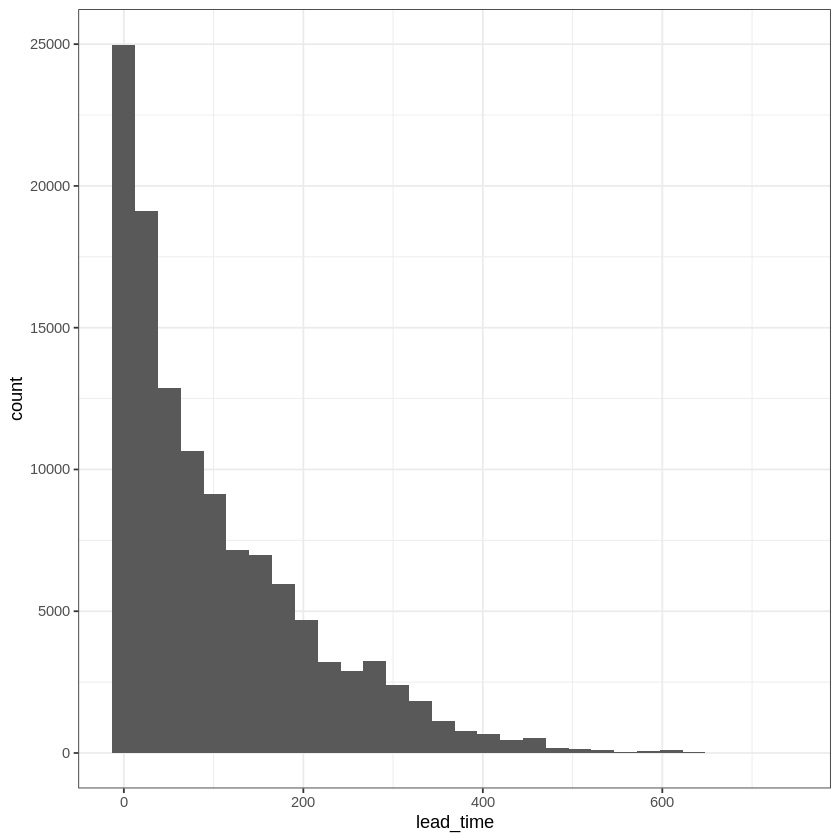

In [24]:
#lead_time
tib %>%  ggplot(aes(x = lead_time)) + geom_histogram()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# 4. 변수별 상관관계 및 분포 시각화